# Part 1 : ROC curve

In [31]:
# read the data into a Pandas DataFrame
import pandas as pd
mailing = pd.read_csv('data/mailing.csv')

In [32]:
feature_cols = ['Income', 'Firstdate', 'Lastdate', 'Amount', 'rfaf2', 'glast', 'gavr', 'rfaa2_G', 'rfaa2_E', 'rfaa2_F', 'pepstrfl_0']
X = mailing[feature_cols]
y = mailing['class']

In [33]:
# 1. Randomly assign 75% of data into training and 25% into test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [34]:
# 2. train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [36]:
# calculate accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.949442069037


In [37]:
# Confusion Matrix
print metrics.confusion_matrix(y_test, y_pred_class)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

[[45521     1]
 [ 2423     0]]


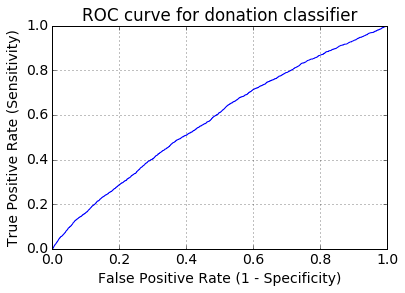

In [38]:
# 2. Use the test data to get the data to create an ROC curve
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for donation classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [39]:
def Decision_Tree_Image(decision_tree, feature_names, name="temp"):
    # Export our decision tree to graphviz format
    #dot_file = tree.export_graphviz(decision_tree.tree_, out_file='images/' + name + '.dot', feature_names=feature_names)
    with open("images/temp.dot", 'w') as f:
        export_graphviz(decision_tree.tree_, out_file=f, feature_names=feature_names)

    # Call graphviz to make an image file from our decision tree
    os.system("dot -Tpng images/" + name + ".dot -o images/" + name + ".png")
    
    # Return the .png image so we can see it
    return Image(filename='images/' + name + '.png')

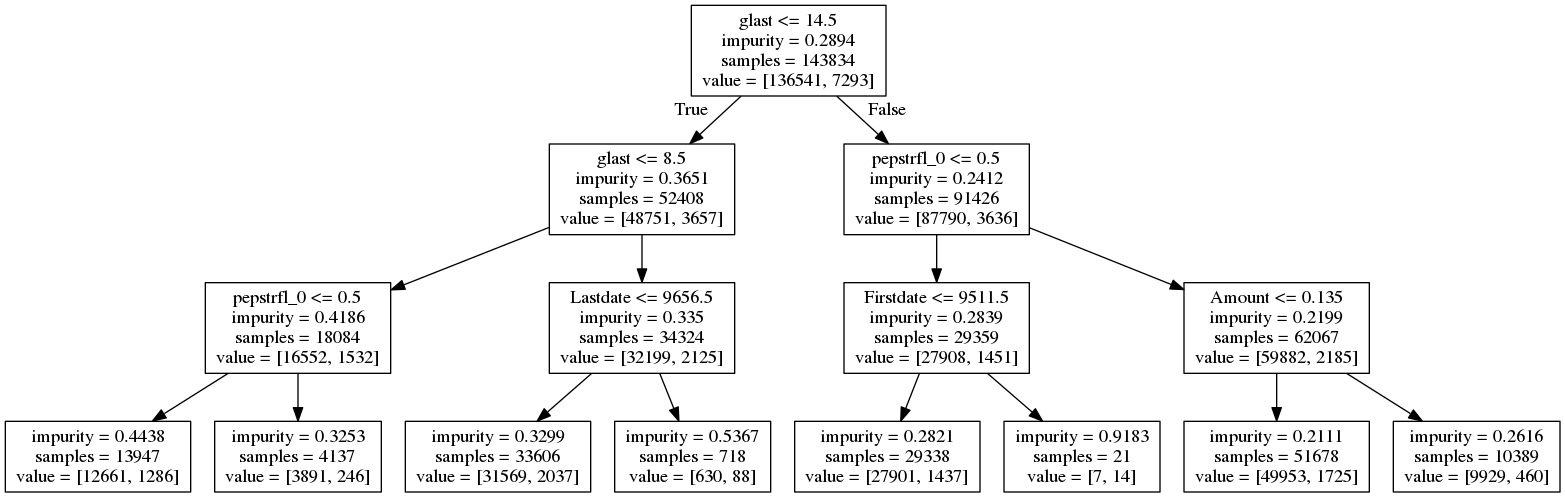

In [40]:
# 3. Train a decision tree model (criterion="entropy")
import os
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, export_graphviz
decision_tree = DecisionTreeClassifier(max_depth=3, criterion="entropy")
decision_tree.fit(X_train, y_train)
Decision_Tree_Image(decision_tree, X.columns)

In [41]:
# 3. Use the test data to get the data to create an ROC curve
y_predict = decision_tree.predict_proba(X_test)[:, 1]

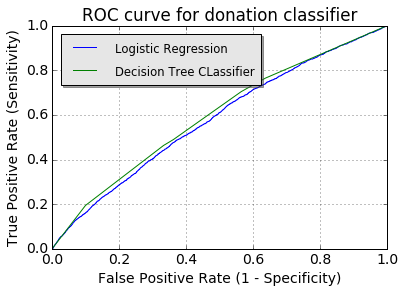

In [42]:
# 4. Plot both ROC curves on one plot with legends
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
plt.plot(fpr, tpr, label='Decision Tree CLassifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for donation classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
legend = plt.legend(loc='upper left', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('small')

##### 5. Discuss which model has better performance

Since the Area Under the Curve(AUC) for a Decision Tree Classifier is higher than the AUC of Logistic Regression Classifier, we can conclude that the Decision Tree has a better performance.

# Part 2: Cross Validation

With depth = 1 Accuracy = 0.949
Mean accuracy with 5 folds cross validations is = 0.949338

With depth = 2 Accuracy = 0.949
Mean accuracy with 5 folds cross validations is = 0.949338

With depth = 3 Accuracy = 0.950
Mean accuracy with 5 folds cross validations is = 0.949353

With depth = 4 Accuracy = 0.950
Mean accuracy with 5 folds cross validations is = 0.949452

With depth = 5 Accuracy = 0.950
Mean accuracy with 5 folds cross validations is = 0.949426

With depth = 6 Accuracy = 0.949
Mean accuracy with 5 folds cross validations is = 0.949343

With depth = 7 Accuracy = 0.949
Mean accuracy with 5 folds cross validations is = 0.949285

With depth = 8 Accuracy = 0.949
Mean accuracy with 5 folds cross validations is = 0.949192

With depth = 9 Accuracy = 0.949
Mean accuracy with 5 folds cross validations is = 0.948800

With depth = 10 Accuracy = 0.949
Mean accuracy with 5 folds cross validations is = 0.948295

With depth = 11 Accuracy = 0.948
Mean accuracy with 5 folds cross validations i

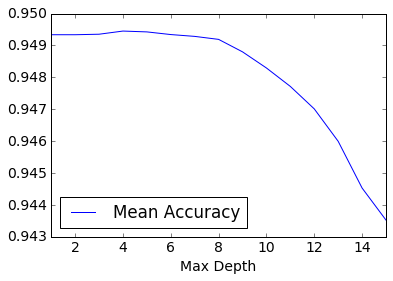

In [43]:
# 1. Try different values of max_depth and find which one is the most accurate.
from sklearn.cross_validation import cross_val_score
mean_scores = []
for i in range (1, 16):
    decision_tree = DecisionTreeClassifier(max_depth=i, criterion="entropy")
    decision_tree.fit(X_train, y_train)
    print "With depth = %i Accuracy = %.3f" % (i, metrics.accuracy_score(decision_tree.predict(X_test), y_test))
    
    # 2. For each maximum depth, perform 5 folds cross-validation, and get the mean accuracy
    scores = cross_val_score(decision_tree, X, y, cv=5, scoring='accuracy')
    mean_scores.append((i, scores.mean()) )
    
    print "Mean accuracy with 5 folds cross validations is = %f\n" % scores.mean()
    
# 3. Plot the mean accuracies over maximum depth
df = pd.DataFrame(mean_scores)
df.columns = ['Max Depth', 'Mean Accuracy']
df.plot(x='Max Depth', y='Mean Accuracy')

##### 4. Find out what is the optimal maximum depth for the decision tree
We observe that the Mean Accuracy is the highest (0.949452) when the Maximum Depth is 4. As the Max Depth increases after Accuracy drops steeply after a depth of 8. And is much lower in case of 15.